In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylidc as pl
from project_config import env_config

nodule_df_path = env_config.nodule_df_file
nodule_processed_df_path = env_config.processed_nodule_df_file
hold_out_nodule_df_path = env_config.hold_out_nodule_df_file

plots_path = "report/plots"

## Distribution of annotations malignancy

6859

37.99387665840502

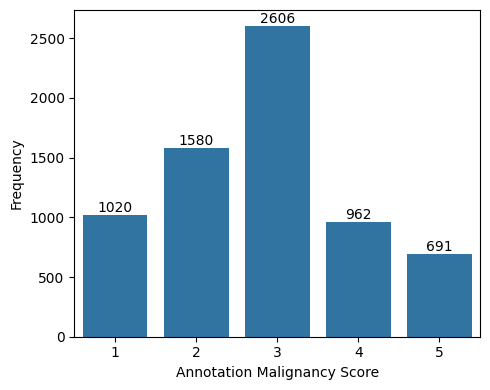

In [75]:
annotation_malignancy_counts = [
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 1).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 2).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 3).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 4).count(),
    pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 5).count(),
]

total = (sum(annotation_malignancy_counts))
display(total)

# calculate percentage == 3
percentage = annotation_malignancy_counts[2] / total * 100
display(percentage)

plt.figure(figsize=(5, 4))
sns.barplot(x=[1, 2, 3, 4, 5], y=annotation_malignancy_counts)
for i, count in enumerate(annotation_malignancy_counts):
    plt.text(i, count, count, ha='center', va='bottom')
plt.xlabel('Annotation Malignancy Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f'{plots_path}/malignancy_score_distribution.png')

## Distribution of ALL nodules consensus malignancy

In [9]:
nodule_df = pd.read_csv(nodule_df_path)
nodule_processed_df = pd.read_csv(nodule_processed_df_path)
hold_out_nodule_df = pd.read_csv(hold_out_nodule_df_path)

In [16]:
display(hold_out_nodule_df.head())
display(nodule_processed_df.head())

,index,pid,nodule_idx,ann_mean_diameter,ann_mean_volume,nodule_annotation_ids,nodule_annotation_count,malignancy_scores,subtlety_scores,consensus_centroid,...,bbox_10_standardised,bbox_20_standardised,bbox_30_standardised,bbox_40_standardised,bbox_50_standardised,bbox_60_standardised,bbox_70_standardised,bbox_80_standardised,bbox_90_standardised,bbox_100_standardised
0,0_LIDC-IDRI-0007,LIDC-IDRI-0007,0,34.442066,8296.775818,"(124, 126, 127, 128)",4,"(5, 5, 5, 4)","(5, 5, 5, 5)","(289, 194, 107)",...,True,True,True,True,True,True,True,False,False,False
1,0_LIDC-IDRI-0037,LIDC-IDRI-0037,0,18.539941,1601.196289,"(348, 351, 352, 353)",4,"(4, 5, 3, 4)","(5, 5, 5, 5)","(288, 407, 82)",...,True,True,True,True,True,True,True,True,True,True
2,0_LIDC-IDRI-0064,LIDC-IDRI-0064,0,29.790760,10658.264160,"(661, 664, 666, 667)",4,"(3, 4, 3, 2)","(5, 5, 5, 3)","(252, 397, 77)",...,True,True,True,True,True,True,True,True,True,True
3,0_LIDC-IDRI-0068,LIDC-IDRI-0068,0,6.046273,84.625246,"(700, 706, 710, 713)",4,"(2, 3, 3, 3)","(3, 4, 4, 3)","(341, 324, 118)",...,True,True,True,True,True,True,True,True,True,True
4,1_LIDC-IDRI-0068,LIDC-IDRI-0068,1,7.677837,148.441006,"(699, 705, 711, 714)",4,"(2, 3, 3, 4)","(3, 4, 4, 3)","(216, 411, 149)",...,True,True,True,True,True,True,True,True,True,True


,index,pid,nodule_idx,ann_mean_diameter,ann_mean_volume,nodule_annotation_ids,nodule_annotation_count,malignancy_scores,subtlety_scores,consensus_centroid,...,bbox_10_standardised,bbox_20_standardised,bbox_30_standardised,bbox_40_standardised,bbox_50_standardised,bbox_60_standardised,bbox_70_standardised,bbox_80_standardised,bbox_90_standardised,bbox_100_standardised
0,0_LIDC-IDRI-0001,LIDC-IDRI-0001,0,32.755812,6989.673615,"(84, 85, 86, 87)",4,"(5, 5, 5, 4)","(5, 5, 5, 5)","(366, 315, 89)",...,True,True,True,True,True,True,True,True,False,False
1,0_LIDC-IDRI-0002,LIDC-IDRI-0002,0,30.781671,7244.667508,"(88, 89)",2,"(5, 4)","(2, 1)","(361, 345, 185)",...,True,True,True,True,True,True,True,True,True,True
2,0_LIDC-IDRI-0003,LIDC-IDRI-0003,0,31.664468,4731.410934,"(102,)",1,"(2,)","(1,)","(346, 368, 66)",...,True,True,True,True,True,True,True,True,True,True
3,1_LIDC-IDRI-0003,LIDC-IDRI-0003,1,31.001964,6519.463698,"(90, 93, 98, 99)",4,"(5, 5, 3, 4)","(5, 5, 5, 5)","(350, 366, 75)",...,True,True,True,True,True,True,True,True,True,True
4,2_LIDC-IDRI-0003,LIDC-IDRI-0003,2,13.309155,472.089669,"(91, 95, 97, 100)",4,"(4, 4, 3, 2)","(4, 4, 3, 3)","(197, 307, 82)",...,True,True,True,True,True,True,True,True,True,True


In [24]:
nodule_df.shape

(2625, 33)

In [ ]:
# total should be 2141
full_df = pd.concat([nodule_df, hold_out_nodule_df])
display(full_df.shape)

# full_df["pid"]

(2879, 33)

# Annotation Correlation Plot
We reorder the values of the features that do not reflect a natural scale. These are:
- calcification

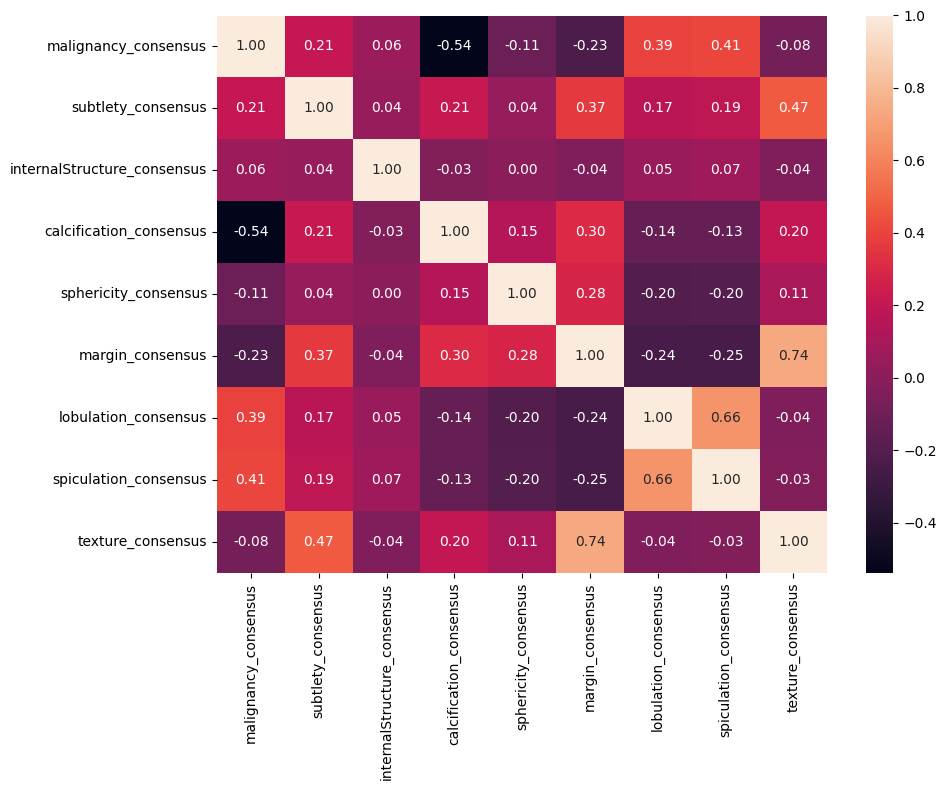

In [ ]:
nodule_df = pd.read_csv(nodule_df_path)[["malignancy_consensus", "subtlety_consensus", "internalStructure_consensus", "calcification_consensus", "sphericity_consensus", "margin_consensus", "lobulation_consensus", "spiculation_consensus", "texture_consensus"]]

# excluded:
# internalStructure_consensus


"""
new order of calcification:
1. abscent
2. non-central
3. central
4. solid
5. laminated
6. popcorn
"""
calcification_mapping = {6:1, 1:6, 2:5, 3:4, 4:2, 5:3}

nodule_df["calcification_consensus"] = nodule_df["calcification_consensus"].map(calcification_mapping)

# plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nodule_df.corr(method="pearson"), annot=True, fmt=".2f")
plt.tight_layout()

## Model Performance Trend for different context windows plot

In [ ]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



def get_results_df(experiment_ids: list[str]) -> pd.DataFrame:
    local_user = "newuser"
    results = {}
    for e in experiment_ids:
        local_exp_path = f"/Users/{local_user}/Documents/ITU/master_thesis/hpc/jobs/{e}"
        with open(f"{local_exp_path}/run_{e}.json") as f:
            config = json.load(f)
        results[e] = config

    # get aggregated results from all folds
    dataframes = []
    for exp in experiment_ids:
        info = exp.split("_")
        context = info[0]
        dimensionality = info[1]
        all_fold_results = {
            "auc_filtered": [],
            "auc_ovr": [],
            "mae": [],
            "mse": [],
            "cwce": [],
            "accuracy": [],
        }
        for fold in results[exp]["fold_results"]:
            # choosen_loss =  # fold["best_loss"] # TODO use the metrics for the best loss
            val_auc_filtered = fold["val_AUC_filtered"][-1]
            val_auc_ovr = fold["val_AUC_ovr"][-1]
            val_mae = fold["val_maes"][-1]
            val_mse = fold["val_mses"][-1]
            val_cwce = fold["val_cwces"][-1]
            val_accuracy = fold["val_accuracies"][-1]

            all_fold_results["auc_filtered"].append(val_auc_filtered)
            all_fold_results["auc_ovr"].append(val_auc_ovr)
            all_fold_results["mae"].append(val_mae)
            all_fold_results["mse"].append(val_mse)
            all_fold_results["cwce"].append(val_cwce)
            all_fold_results["accuracy"].append(val_accuracy)

        agg_results = {}
        for k, v in all_fold_results.items():
            agg_results[k] = context, dimensionality, np.mean(v), np.std(v)

        results_df = pd.DataFrame.from_dict(agg_results, orient="index", columns=["context", "dim", "mean", "std"])
        dataframes.append(results_df)

    results_df = pd.concat(dataframes).reset_index().rename(columns={"index": "metric"})
    return results_df

experiments_25D = [
    "c20_25D_2411_1631",
    "c30_25D_2411_1543",
    "c40_25D_2411_1640",
    "c50_25D_2411_1812",
    "c60_25D_2411_1641",
    "c70_25D_2411_1705",
]
experiments_3D = [
    "c30_3D_1711_1513",
    "c50_3D_1711_2149",
]

agg_results_25D = get_results_df(experiments_25D)
agg_results_3D = get_results_df(experiments_3D)
print("25D")
display(agg_results_25D)
print("3D")
display(agg_results_3D)

25D


,metric,context,dim,mean,std
0,auc_filtered,c20,25D,0.902365,0.025936
1,auc_ovr,c20,25D,0.715227,0.042274
2,mae,c20,25D,0.525251,0.053000
3,mse,c20,25D,0.660578,0.083183
4,cwce,c20,25D,0.345521,0.032302
5,accuracy,c20,25D,0.540885,0.039815
6,auc_filtered,c30,25D,0.904735,0.043271
7,auc_ovr,c30,25D,0.705213,0.036558
8,mae,c30,25D,0.573710,0.084871
9,mse,c30,25D,0.768019,0.211353


3D


,metric,context,dim,mean,std
0,auc_filtered,c30,3D,0.90940,0.011134
1,auc_ovr,c30,3D,0.72614,0.008907
2,mae,c30,3D,0.50532,0.019446
3,mse,c30,3D,0.61834,0.048372
4,cwce,c30,3D,0.32766,0.032486
5,accuracy,c30,3D,0.54674,0.018198
6,auc_filtered,c50,3D,0.87980,0.055154
7,auc_ovr,c50,3D,0.70438,0.055933
8,mae,c50,3D,0.54844,0.091653
9,mse,c50,3D,0.71444,0.147679


NameError: name 'sns' is not defined

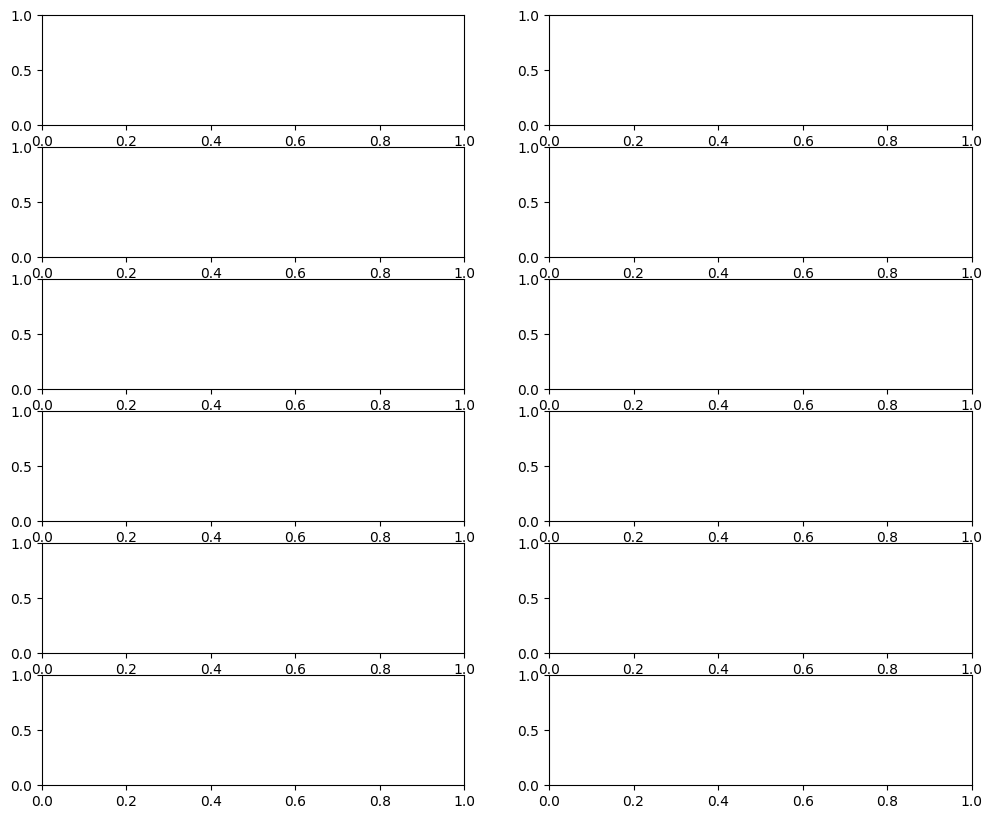

In [2]:
n_metrics = agg_results_25D["metric"].nunique()
fig, axes = plt.subplots(nrows=n_metrics, ncols=2, figsize=(12, 10))

markers = ['o', 's', '^', 'D', 'P', '*']
colors = sns.color_palette("tab10")

for i, metric in enumerate(agg_results_25D["metric"].unique()):
    metric_25D = agg_results_25D[agg_results_25D["metric"] == metric]
    metric_3D = agg_results_3D[agg_results_3D["metric"] == metric]

    # 25D
    ax = axes[i, 0]
    if i == 0:
        ax.set_title("2.5D", fontsize=14)
    sns.lineplot(x="context", y="mean", data=metric_25D, ax=ax, marker=markers[i], color=colors[i])
    ax.fill_between(
        x=metric_25D["context"],
        y1=metric_25D["mean"] - metric_25D["std"],
        y2=metric_25D["mean"] + metric_25D["std"],
        color=colors[i],
        alpha=0.2,
    )
    ax.set_ylabel(metric.upper())
    ax.set_xlabel("")
    ax.grid(True)

    # 3D
    # ax = axes[i, 1]
    # if i == 0:
    #     ax.set_title("3D", fontsize=14)
    # sns.lineplot(x="context", y="mean", data=metric_3D, ax=ax, marker=markers[i], color=colors[i])
    # ax.fill_between(
    #     metric_3D["context"],
    #     metric_3D["mean"] - metric_3D["std"],
    #     metric_3D["mean"] + metric_3D["std"],
    #     color=colors[i],
    #     alpha=0.2,
    # )
    # ax.set_ylabel("")
    # ax.set_xlabel("")
    # ax.grid(True)

plt.suptitle("Performance Metrics Trend Contexts", fontsize=16)
plt.tight_layout()
plt.show()

**NOTE**: the errorbar in the plot above is 1 whole std both above and below the line.

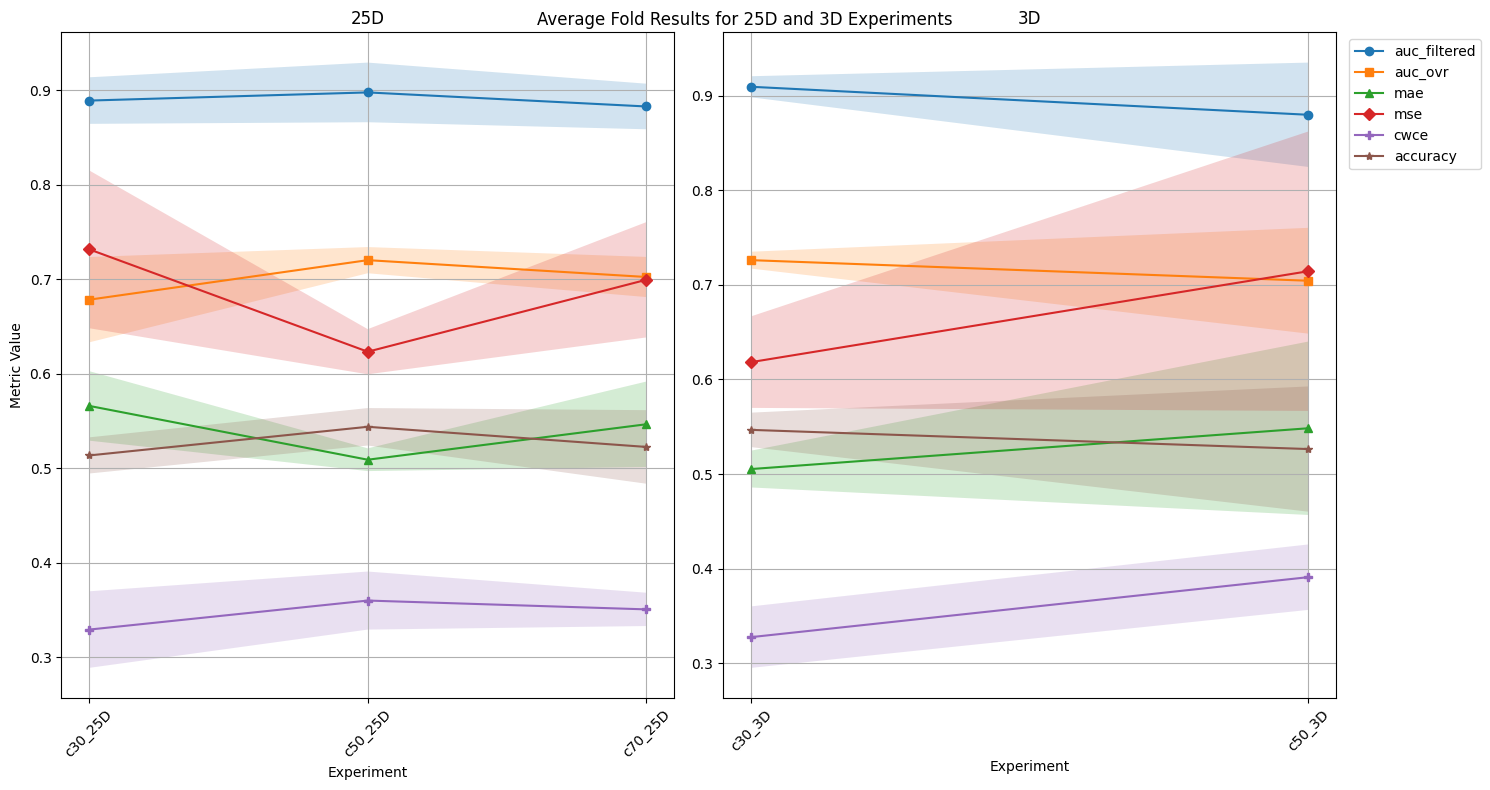

In [216]:
# Define unique markers for each line
def plot_agg_results(agg_results_df: pd.DataFrame, ax) -> plt.Figure:
    markers = ['o', 's', '^', 'D', 'P', '*']

    for metric, marker in zip(agg_results_df["metric"].unique(), markers):
    # Plot the results with different markers
        metric_data = agg_results_df.query(f"metric == '{metric}'")
        ax.plot(
            range(len(metric_data)),
            metric_data["mean"],
            label=metric,
            marker=marker,
        )
        ax.fill_between(
            range(len(metric_data)),
            metric_data["mean"] - metric_data["std"],
            metric_data["mean"] + metric_data["std"],
            alpha=0.2
        )

    # Change the x-axis labels to the context and dimensionality
    x_labels = [f"{row['context']}_{row['dim']}" for i, row in agg_results_df.query("metric == 'mae'").iterrows()]
    ax.set_xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45)
    ax.set_xlabel("Experiment")
    ax.grid(True)

    # Move the legend outside the plot
    dims = agg_results_df["dim"].unique()[0]
    ax.set_title(dims)
    return fig


fig, ax = plt.subplots(1, 2, figsize=(15, 8))
plot_agg_results(agg_results_25D, ax[0])
plot_agg_results(agg_results_3D, ax[1])
ax[0].set_ylabel("Metric Value")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.suptitle("Average Fold Results for 25D and 3D Experiments")
plt.savefig(f"report/plots/average_fold_results.png")
plt.show()
